In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats

df = pd.read_csv('abalone.csv', header=None)

In [11]:
df.columns=['Sex', 'Length', 'Diameter', 'Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [31]:
df.shape

(4177, 9)

In [12]:
df.isnull().values.any()

False

# Reserach Question 
Can we predict the age of abalone by measurement?

## Relevant data set information

Predicting the age of abalone from physical measurements.  The age of
abalone is determined by cutting the shell through the cone, staining it,
and counting the number of rings through a microscope -- a boring and
time-consuming task.  Other measurements, which are easier to obtain, are
used to predict the age.  Further information, such as weather patterns
and location (hence food availability) may be required to solve the problem.


## Univariate Variables Description

    Nine variables
    4,177 rows, which makes for 37,593 datapoints
    Eight continuous data points and one categorical data point(Gender)
    Length and Diameter variables are showing normal distributions with some negative skew and positive kurtosis.
    The variables involving weight are showing negative kurtosis and some positive skew.
    There are zero null values in this data set
    
## Bivariate Data Description
    Seeing strong positive correlations with diameter and length, weight and height, 

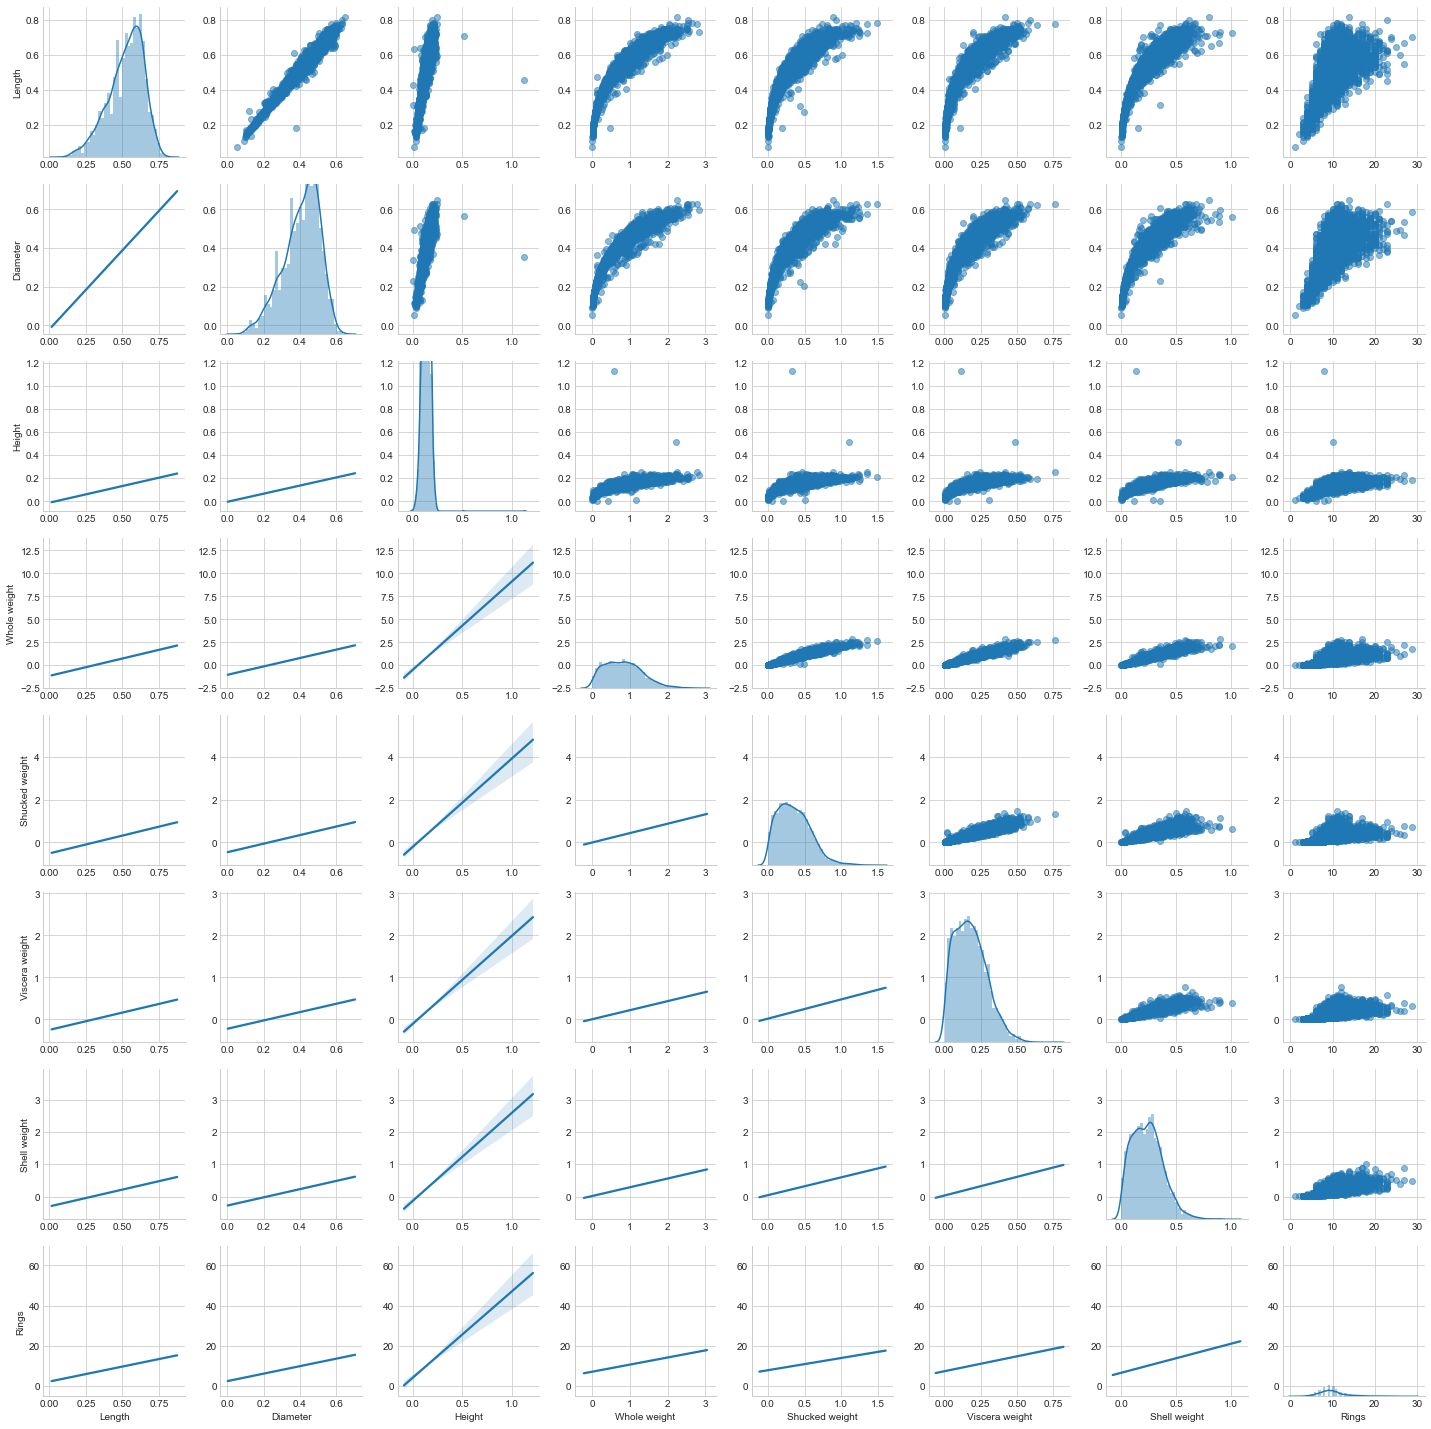

In [27]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.distplot)
plt.show()

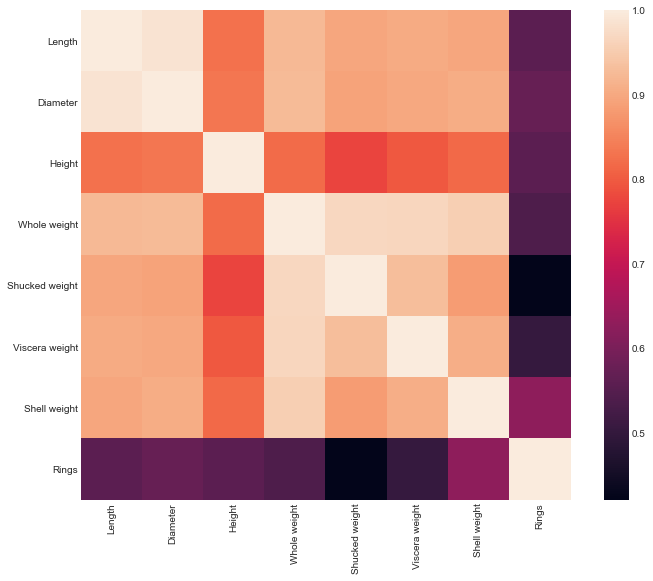

In [63]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)
plt.show()

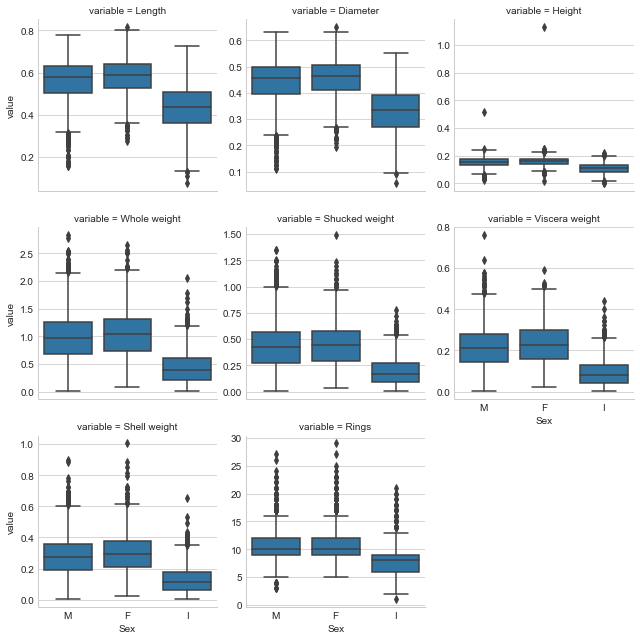

    Diameter                                                        Height  \
       count      mean       std    min    25%    50%    75%   max   count   
Sex                                                                          
F     1307.0  0.454732  0.070954  0.195  0.410  0.465  0.505  0.65  1307.0   
I     1342.0  0.326494  0.088109  0.055  0.270  0.335  0.390  0.55  1342.0   
M     1528.0  0.439287  0.084398  0.110  0.395  0.455  0.500  0.63  1528.0   

                ...   Viscera weight         Whole weight                      \
         mean   ...              75%     max        count      mean       std   
Sex             ...                                                             
F    0.158011   ...          0.29725  0.5900       1307.0  1.046532  0.430316   
I    0.107996   ...          0.13000  0.4405       1342.0  0.431363  0.286275   
M    0.151381   ...          0.27800  0.7600       1528.0  0.991459  0.470581   

                                            

In [62]:
df_melt = pd.melt(df, id_vars='Sex')

g = sns.FacetGrid(df_melt, col='variable', sharey=False, col_wrap=3)
g = g.map(sns.boxplot,'Sex', 'value')
plt.show()

#Descriptive statistics by Sex (female, male, infant)
print(df.groupby('Sex').describe())

#T-test for Female and Male

print('\n\nDoing a T-test for Male and Female (infant not calculated) \n')
for col in df.loc[:,'Length':'Rings']:
    print(col)
    print(stats.ttest_ind(
        df[df['Sex'] == 'M'][col].dropna(),
        df[df['Sex'] == 'F'][col].dropna()
    ))
    
    
